# Xarray example
Load a snow data set from a model (IPSL-CM6A-LR) and compare it to a reanalysis (NOAA) by seasons during the period 1984 to 2014.

## Import main modules

Packages installation (with Anaconda/Miniconda):
- xarray, numpy, matplotlib, cartopy: `conda install xarray numpy matplotlib cartopy`
- xesmf: `conda install -c conda-forge xesmf` (https://xesmf.readthedocs.io/en/latest/installation.html)
- proplot: `conda install -c conda-forge proplot` (https://proplot.readthedocs.io/en/latest/install.html)

In [1]:
# This first line allows to have interactive plots inside the notebook
%matplotlib notebook

import xarray as xr # xarray is for dealing with NetCDF files
import matplotlib.pyplot as plt # for plot
import numpy as np # for maths
import xesmf as xe # for regridding

## Load model data
Note: xarray doesn't directly load the data. It uses "lazy load", and only load data when a operation is occuring. There are many possibilities to take advantage of this + using Dask if memory issues. See xarray_dask_xesmf_proplot folder (when it will be available).

In [2]:
model_dataset = xr.open_dataset("data/snc_LImon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc")
model_dataset

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 143, lon: 144, time: 1980)
Coordinates:
  * lat          (lat) float32 -90.0 -88.73239 -87.46479 ... 88.73239 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    snc          (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:35Z
    tracking_id:            hdl:21.14100/44fd1856-5bf8-40f5-88e1-c55ac7d8d430
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    contact:                ipsl-cmip6@listes.ipsl.fr
    data_specs_version:     01.00.21
    dr2xml_version:         1.11
    experiment_id:          historical
    experiment:             all-forcing simulation of the recent past
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    grid:                   LMDZ grid
    grid_label:             gr
    nominal_resolution:     250 km
    initialization_index:   1
    institution_id:         IPSL
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    license:                CMIP6 model data produced by IPSL is licensed und...
    mip_era:                CMIP6
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_activity_id:     CMIP
    parent_source_id:       IPSL-CM6A-LR
    parent_time_units:      days since 1850-01-01 00:00:00
    branch_method:          standard
    branch_time_in_parent:  21914.0
    branch_time_in_child:   0.0
    physics_index:          1
    product:                model-output
    realm:                  landIce land
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    source_id:              IPSL-CM6A-LR
    source_type:            AOGCM BGC
    sub_experiment_id:      none
    sub_experiment:         none
    table_id:               LImon
    variable_id:            snc
    EXPID:                  historical
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          f1e40c1fc5d8281f865f72fbf4e38f9d
    model_version:          6.1.5
    parent_variant_label:   r1i1p1f1
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:13:19 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"

In [3]:
snc_model = model_dataset.snc.sel(time=slice('1984','2014'))
snc_model

<xarray.DataArray 'snc' (time: 372, lat: 143, lon: 144)>
[7660224 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1984-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

## Loading NOAA (2.0x1.75) reference dataset and selecting period

In [4]:
snc_obs = xr.open_dataset('data/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc').snowc.sel(time=slice('1984','2014'))
snc_obs

<xarray.DataArray 'snowc' (time: 372, lat: 94, lon: 192)>
[6713856 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [  0. 100.]

## Compute seasonal climatology
Note: be aware that the seasons are computed on the same year (in particular for DJF -> JFD). A second point to mention is that the mean is not weighted by the number of days in each month (here for monthly data). See "ma cuisine" for more details.

In [5]:
# You can use groupby with 'time.month', etc.
# If you just want to select some months you can use: snc_model.where(snc_model['time.month'] == 1, drop=True)
# or play with > < | & operations to get what you want

# skipna allows to skip or not nan values in your computation
# keep_attrs allows to keep all atributes after computation (long_name, units, etc.)
snc_model_seasclim = snc_model.groupby('time.season').mean('time', skipna=False, keep_attrs=True)
snc_model_seasclim

<xarray.DataArray 'snc' (season: 4, lat: 143, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

<IPython.core.display.Javascript object>


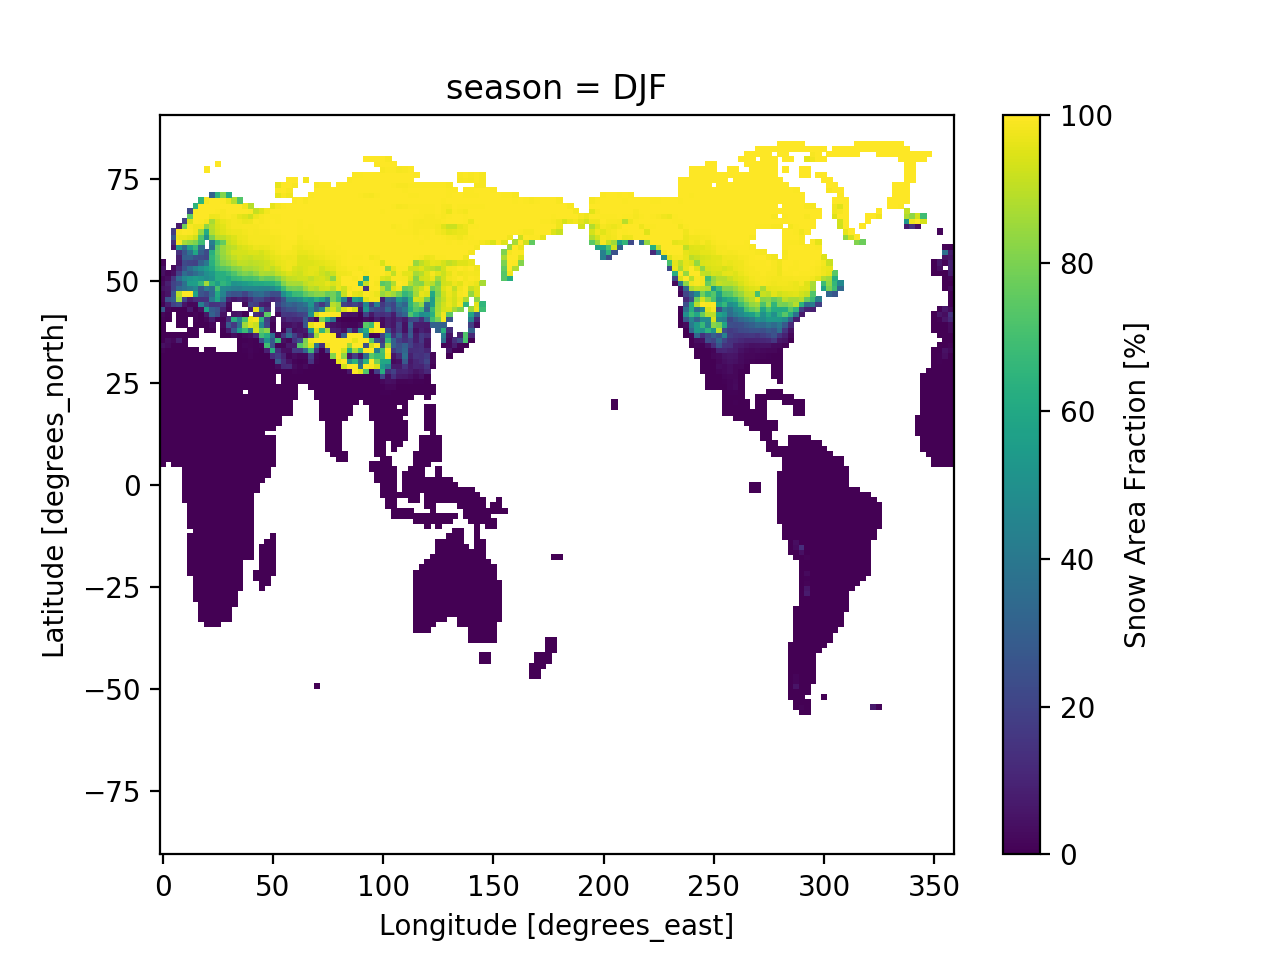

In [6]:
plt.figure()
snc_model_seasclim.sel(season='DJF').plot()

In [8]:
# Same for obs (reanalysis)
snc_obs_seasclim = snc_obs.groupby('time.season').mean('time', skipna=False, keep_attrs=True)
snc_obs_seasclim

<xarray.DataArray 'snowc' (season: 4, lat: 94, lon: 192)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [  0. 100.]

## Regrid model -> obs
Now if we want to compute the bias, we need to have both data set on the same grid. For this we are going to use xESMF package.

In [9]:
# Create a regridder to put the model data on the observation grid
# Think to put periodic=True for periodic data in longitude (what is the case here)
regridder = xe.Regridder(snc_model_seasclim, snc_obs_seasclim, 'bilinear', periodic=True)
regridder

Overwrite existing file: bilinear_143x144_94x192_peri.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_143x144_94x192_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (143, 144) 
Output grid shape:          (94, 192) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [10]:
# Apply the regridder
snc_model_seasclim_regrid = regridder(snc_model_seasclim, keep_attrs=True)
snc_model_seasclim_regrid

<xarray.DataArray 'snc' (season: 4, lat: 94, lon: 192)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella
    regrid_method:       bilinear

## Bias computation

In [11]:
# with xr.set_options(keep_attrs=True): allows to keep the attributes (optional)
with xr.set_options(keep_attrs=True):
    bias = snc_model_seasclim_regrid - snc_obs_seasclim
bias

<xarray.DataArray (season: 4, lat: 94, lon: 192)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella
    regrid_method:       bilinear

<IPython.core.display.Javascript object>


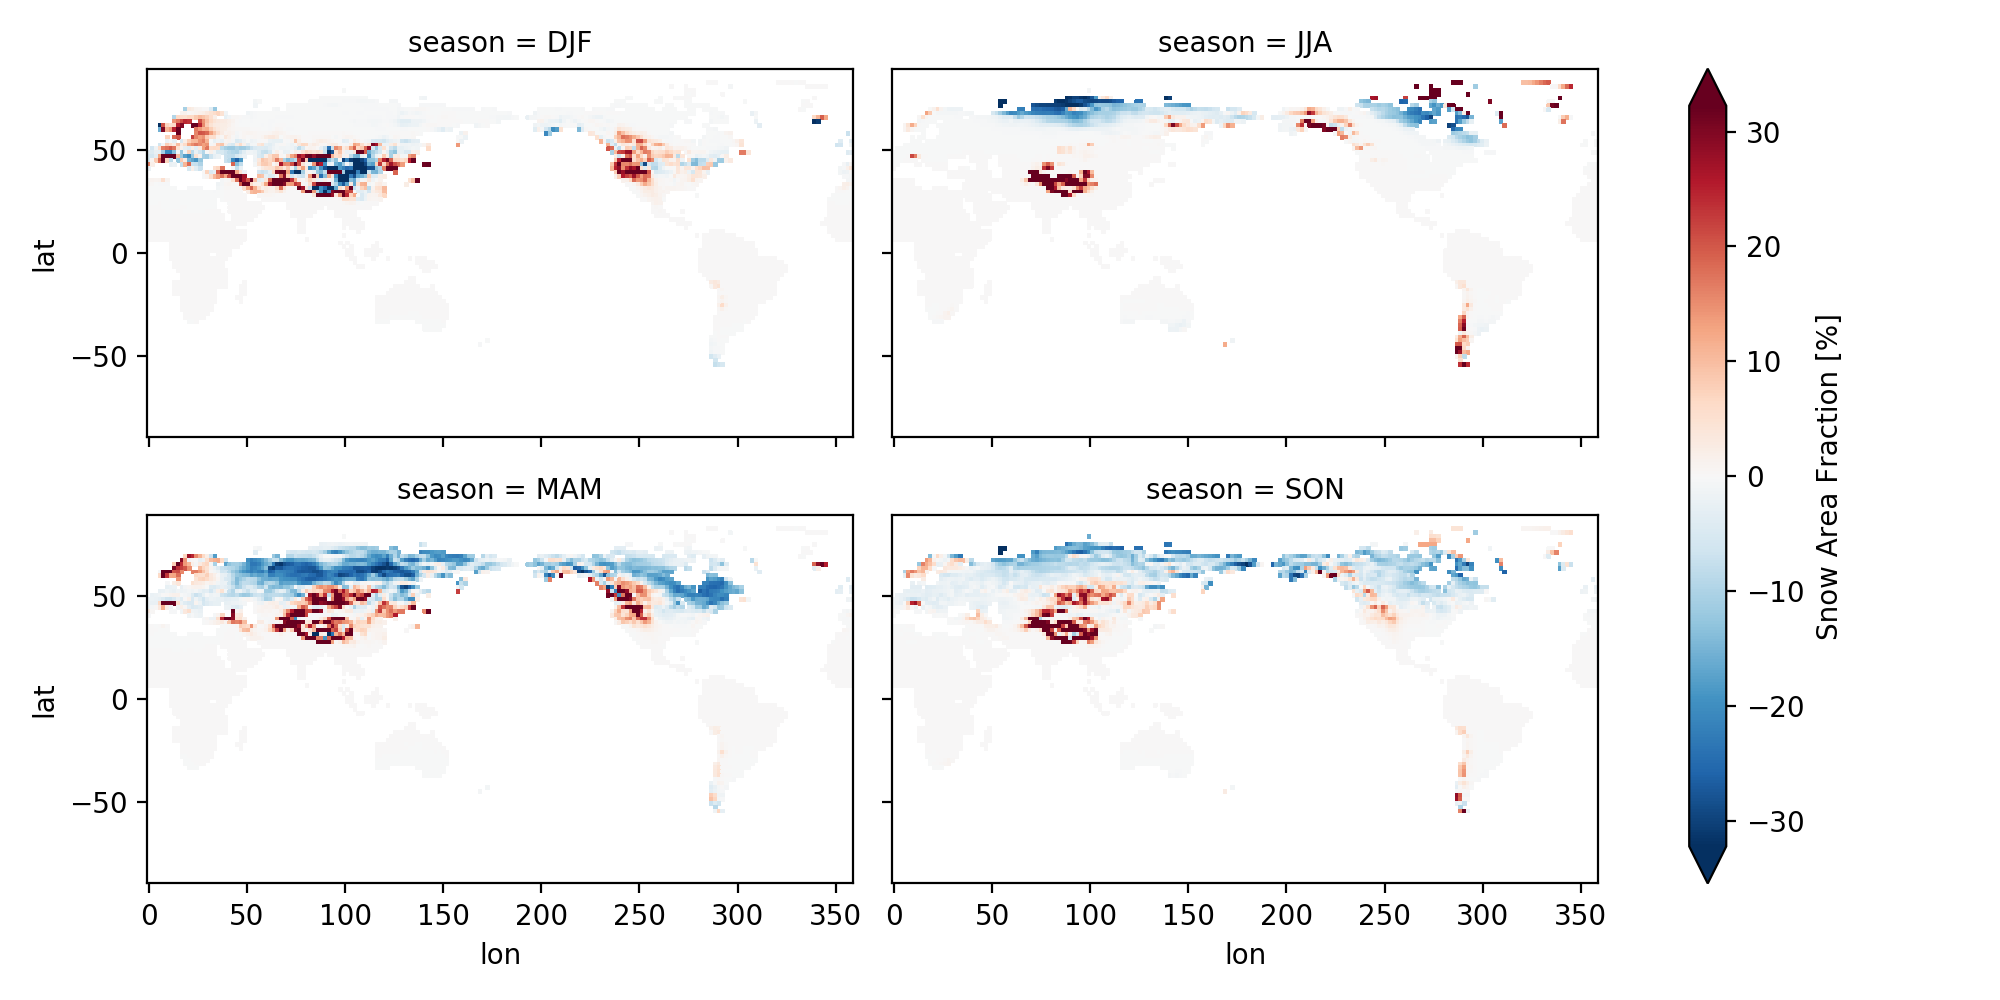

In [12]:
# Quick plot
bias.plot(col='season', col_wrap=2, robust=True, figsize=(10,5))

<IPython.core.display.Javascript object>


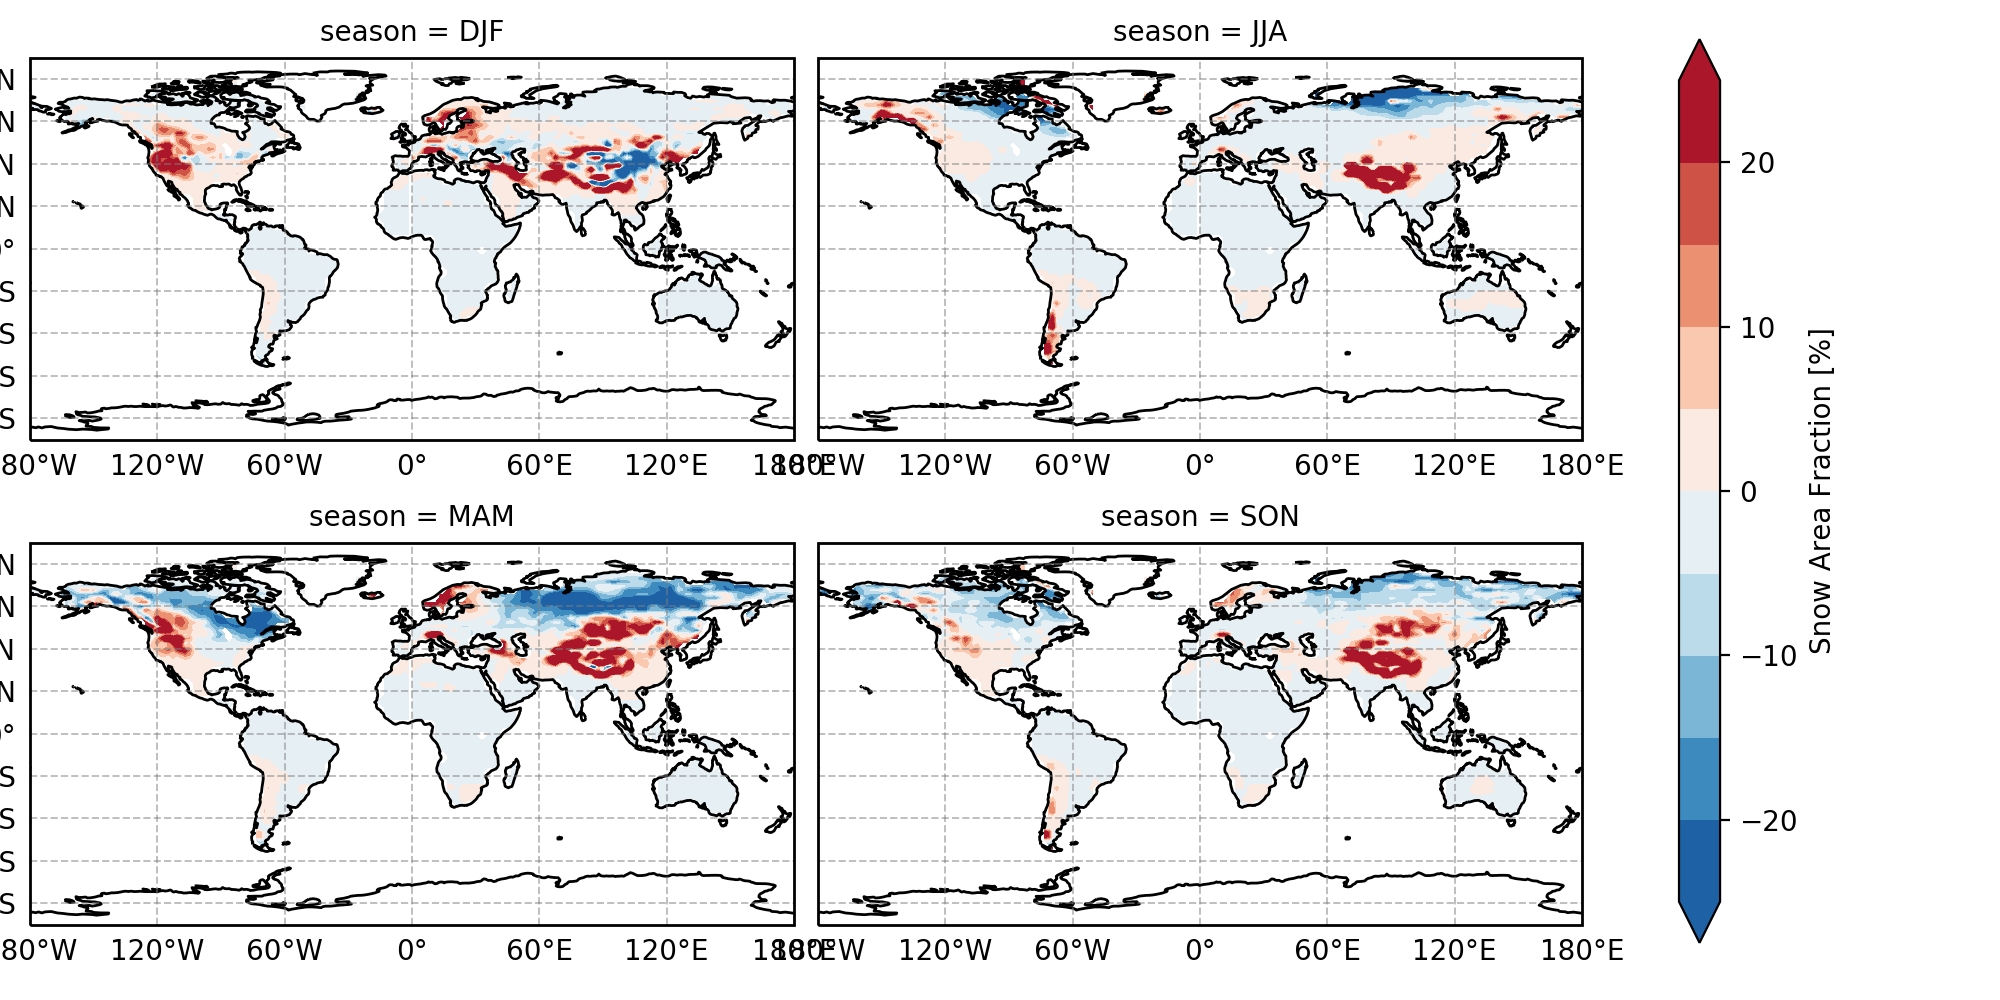

In [13]:
# Painful plot

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

p = bias.plot.contourf(
    col='season', col_wrap=2, levels=np.arange(-25,30,5), cmap='RdBu_r', figsize=(10,5),
    subplot_kws={'projection': ccrs.PlateCarree()}
)

for i, ax in enumerate(p.axes.flat):
    ax.coastlines()
    ax.set_global()

    # https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    if i in [1,3]: gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

# bbox_inches='tight' allows to have a compact plot with everything
# plt.savefig('bias.pdf', bbox_inches='tight')

## Plot using Proplot (NEW)
It is possible with Cartopy to make "beatiful" plots (see above), but it is more painful. Proplot looks like to be a new promissing package.

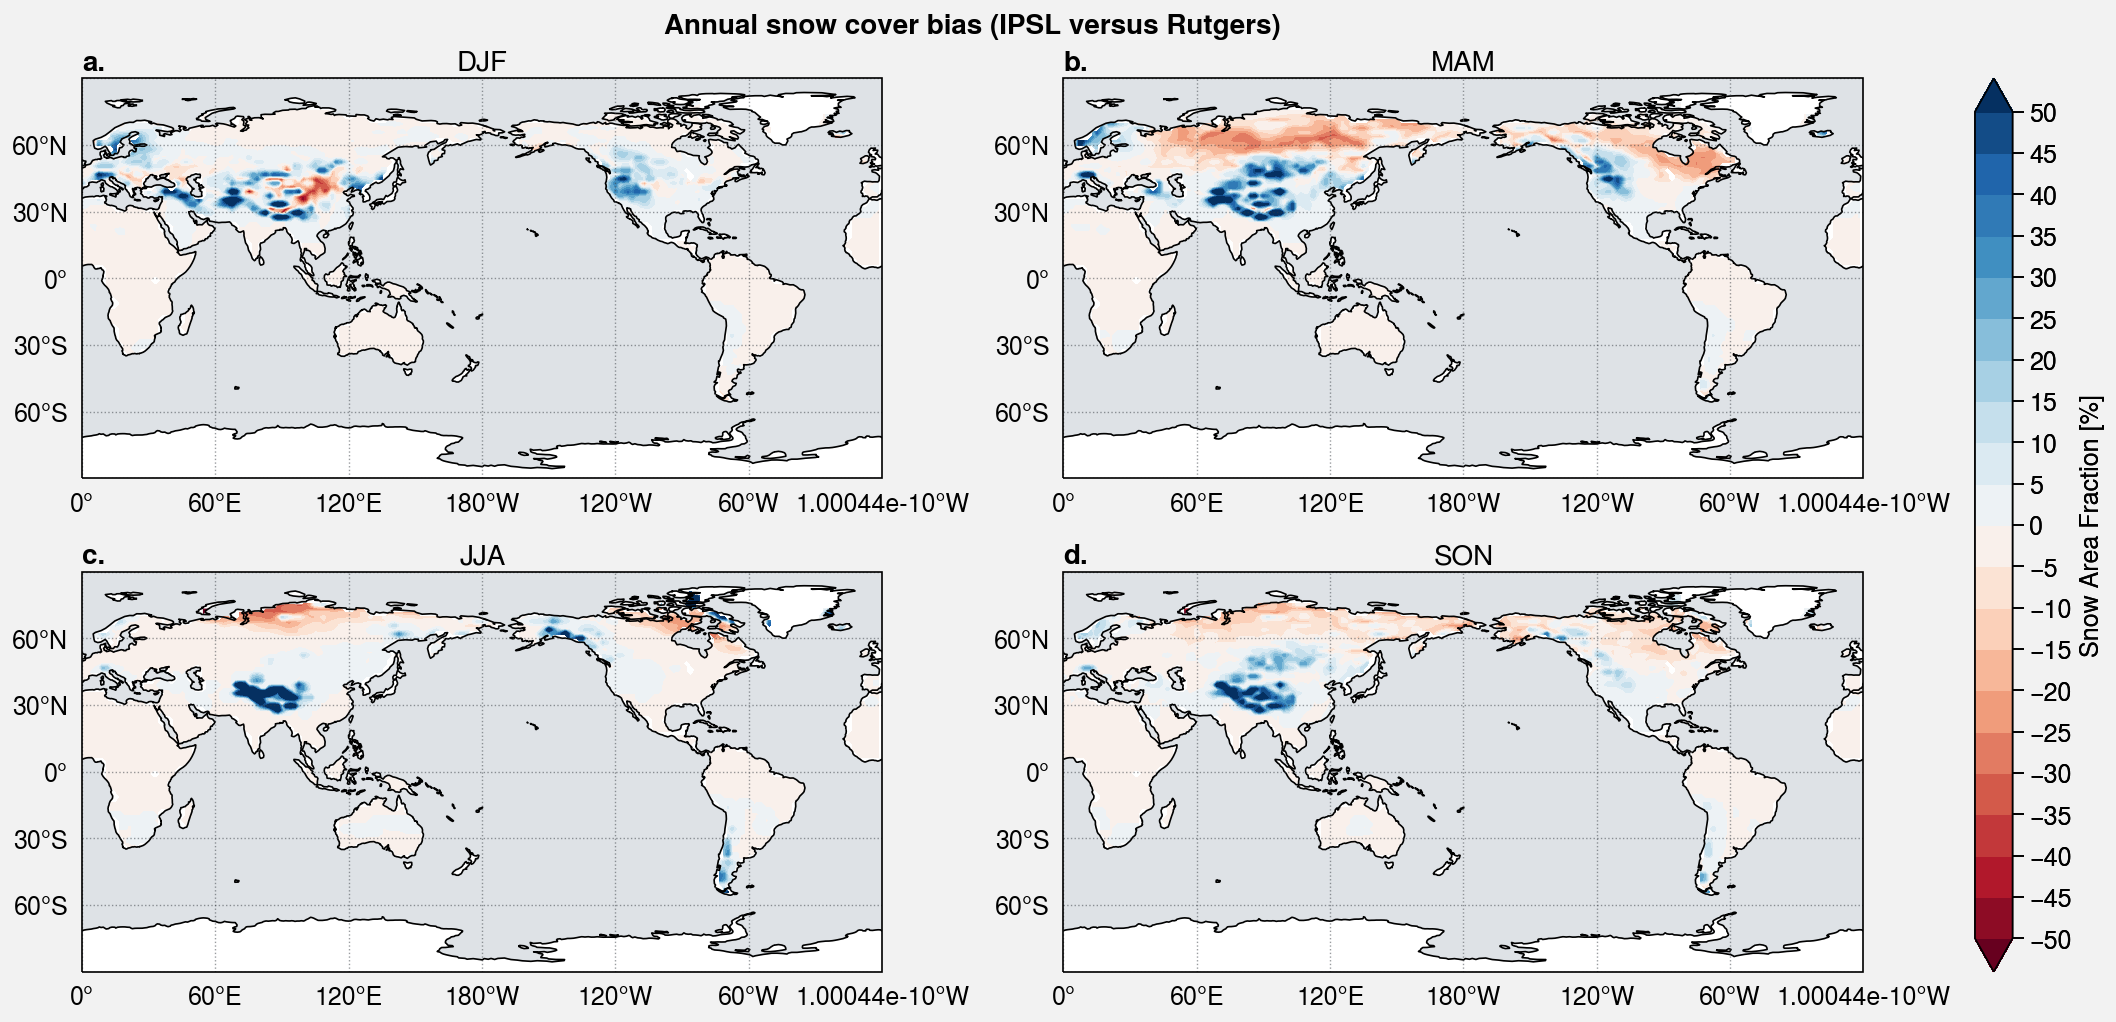

In [15]:
# There are some problems with %matplotlib notebook for now with proplot
# (will be probably solved in the future)
%matplotlib inline
import proplot as plot

f, axs = plot.subplots(
    proj='cyl', proj_kw={'lon_0':180},
    ncols=2, nrows=2, axwidth=4, share=3 # (https://github.com/lukelbd/proplot/issues/79)
)

seasons = ['DJF', 'MAM', 'JJA', 'SON']

for i, ax in enumerate(axs):
    m = ax.contourf(
        bias.sel(season=seasons[i]), 
        cmap='RdBu', levels=np.arange(-50,55,5), extend='both'
    )
    ax.format(title=bias.sel(season=seasons[i]).season.values)
    
f.colorbar(m, label=bias.long_name + " ["+bias.units+"]")

axs.format(geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
           coast=True, ocean=True, oceancolor='gray3',
           suptitle="Annual snow cover bias (IPSL versus Rutgers)",
           lonlines=60, latlines=30, abc=True, abcstyle='a.'
          )